In [1]:
import numpy as np 
import nibabel as nib 
import matplotlib.pyplot as plt 
import nilearn.plotting as niplt
%matplotlib inline
import os 

In [2]:
black_subs=['sub-300', 'sub-304', 'sub-293', 'sub-273', 'sub-265', 'sub-307', 'sub-283', 'sub-275', 
'sub-291', 'sub-297', 'sub-303', 'sub-294', 'sub-286', 'sub-282', 'sub-310', 'sub-302', 'sub-312', 
'sub-301', 'sub-287', 'sub-298', 'sub-313', 'sub-285', 'sub-292', 'sub-311', 'sub-267', 'sub-295', 
'sub-305', 'sub-274', 'sub-290', 'sub-288', 'sub-281', 'sub-276', 'sub-277', 'sub-299', 'sub-308',
 'sub-272', 'sub-284', 'sub-289', 'sub-280', 'sub-309', 'sub-306', 'sub-296', 'sub-127', 'sub-279', 
 'sub-315', 'sub-314']
slumlordreach_subs=['sub-145', 'sub-143', 'sub-016', 'sub-142', 'sub-141', 'sub-133', 'sub-140', 'sub-136', 
'sub-084', 'sub-135', 'sub-137', 'sub-138', 'sub-111', 'sub-106', 'sub-134', 'sub-132', 'sub-144']

rois=['PostTemp','AntTemp','AngG','IFG','IFGorb','MFG','vmPFC','dmPFC','PMC','HG']
roi_names=['L_'+roi for roi in rois]+['R_'+roi for roi in rois] 

def get_result_dataset(dataset,rep_name,noyank=0):
    results=[]
    for story in dataset:
        results_story=[]
        if story=='black':
            subs=black_subs
        if story=='slumlordreach':
            subs=slumlordreach_subs
        if 'layer' not in rep_name:
            result_dir='/jukebox/griffiths/bert-brains/results/'+story+"/encoding-"+story+"_"+rep_name+"/"
        else:
            result_dir='/jukebox/griffiths/bert-brains/results/'+story+"/encoding-"+rep_name+"/"
        roi_mapping=np.load('/jukebox/griffiths/bert-brains/'+story+'_data/Parcel2ROI.npy')
        for sub in subs:
            if noyank==2:
                results_sub_parcels=np.load(result_dir+sub+"_parcelwise_results_yankembeddings.npy")
            elif noyank==1:
                results_sub_parcels=np.load(result_dir+sub+"_parcelwise_results_noyank.npy")
            else:
                results_sub_parcels=np.load(result_dir+sub+"_parcelwise_results.npy")
            results_sub=np.zeros((20,))
            for roi in range(20):
                results_sub[roi]=results_sub_parcels[np.where(roi_mapping==roi+1)].mean() 
            results_story.append(results_sub)
        results_story=np.asarray(results_story)
        results.append(results_story)
    results=np.asarray(results)
    return np.concatenate(results,axis=0)

In [3]:
z_reps=['layer_'+str(i)+"_z_representations" for i in range(12)]
layer_reps=['layer_'+str(i+1)+"_activations" for i in range(12)]
z_reps_mat=np.asarray([get_result_dataset(['black','slumlordreach'],z_reps[i]).mean(axis=0) for i in range(12)])
layer_reps_mat=np.asarray([get_result_dataset(['black','slumlordreach'],layer_reps[i]).mean(axis=0) for i in range(12)])

In [4]:
z_reps_mat=np.mean(np.asarray([z_reps_mat[:,:10],z_reps_mat[:,10:]]),axis=0)
layer_reps_mat=np.mean(np.asarray([layer_reps_mat[:,:10],layer_reps_mat[:,10:]]),axis=0)
z_reps_mat.shape,layer_reps_mat.shape

((12, 10), (12, 10))

In [13]:
np.sum(mat,axis=0).shape

(10,)

(12, 10) -1.5394255908281533


[]

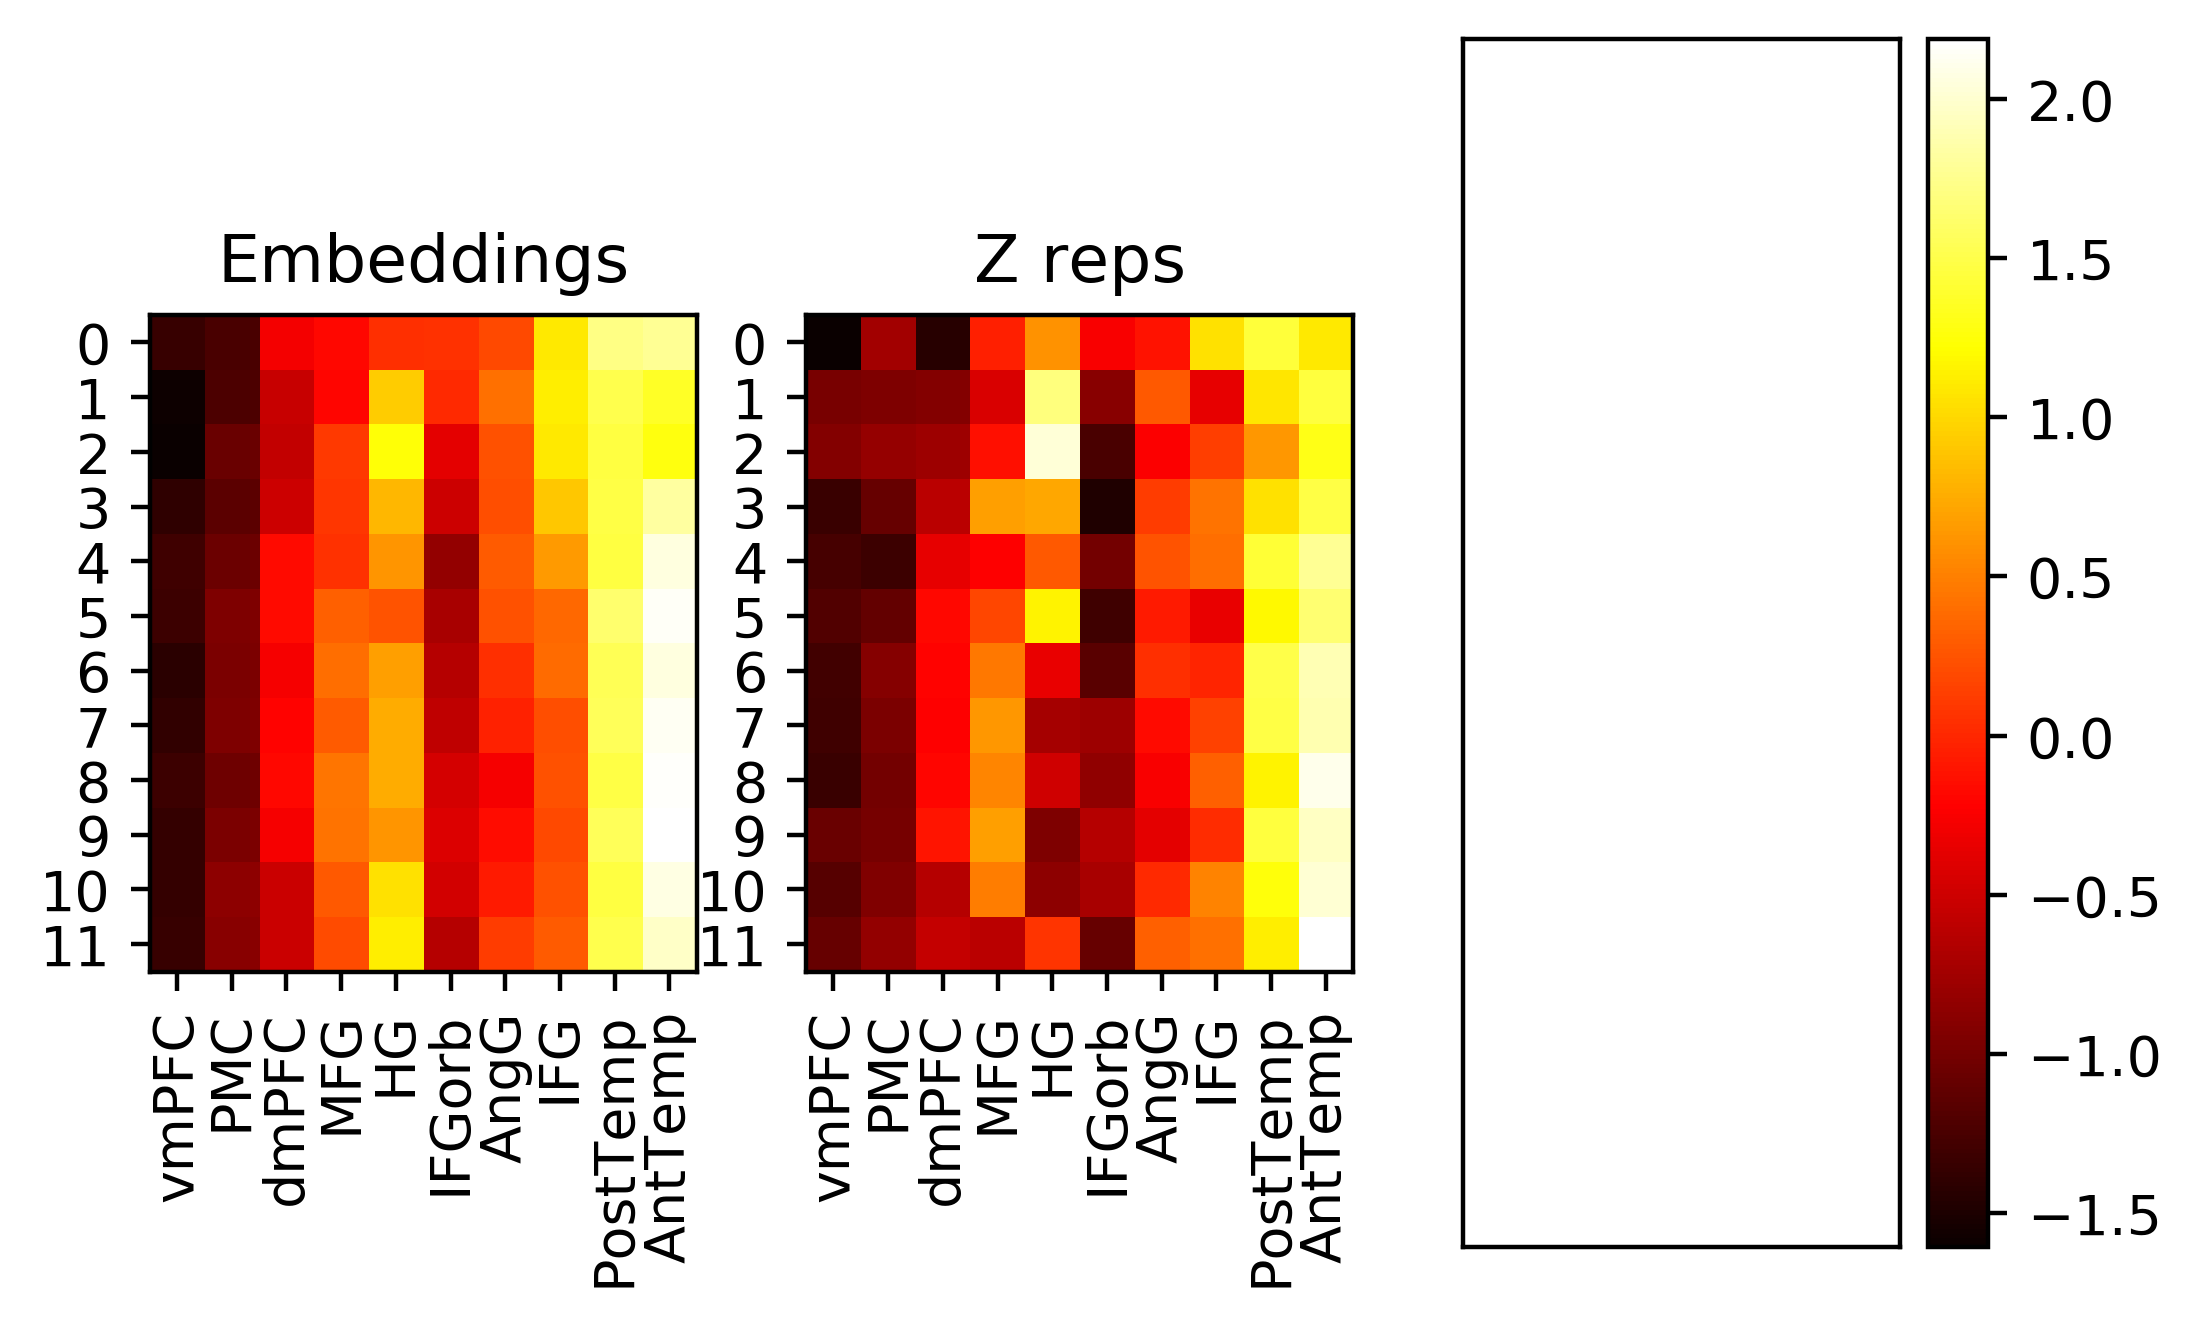

In [25]:
#Sort by first embedding layer
from scipy.stats import zscore
fig,axarr=plt.subplots(ncols=3,nrows=1,dpi=400)
order=np.argsort(layer_reps_mat[0,:])
rois=np.asarray(rois)
mat=zscore(layer_reps_mat[:,order],axis=1)
zmat=zscore(z_reps_mat[:,order],axis=1)
print(mat.shape,np.mean(mat[:,0]))
a=axarr[0].imshow(mat,cmap='hot')
b=axarr[1].imshow(zmat,cmap='hot')
axarr[0].set_xticks(list(range(10)))
axarr[0].set_xticklabels(rois[order],rotation=90)
axarr[1].set_xticks(list(range(10)))
axarr[1].set_xticklabels(rois[order],rotation=90)
axarr[0].set_yticks(list(range(12)))
axarr[1].set_yticks(list(range(12)))
axarr[0].set_title("Embeddings")
axarr[1].set_title("Z reps")
#plt.colorbar(a,ax=axarr[0])
#fig.colorbar(b,orientation='horizontal',pad=0.8)
fig.colorbar(b,ax=axarr[2])
#axarr[2].spines('right').set_visible(False)
axarr[2].set_xticks([])
axarr[2].set_yticks([])

In [27]:
layer_reps_mat=np.asarray([get_result_dataset(['black','slumlordreach'],layer_reps[i]) for i in range(12)])
layer_reps_mat.shape

(12, 63, 20)

[]

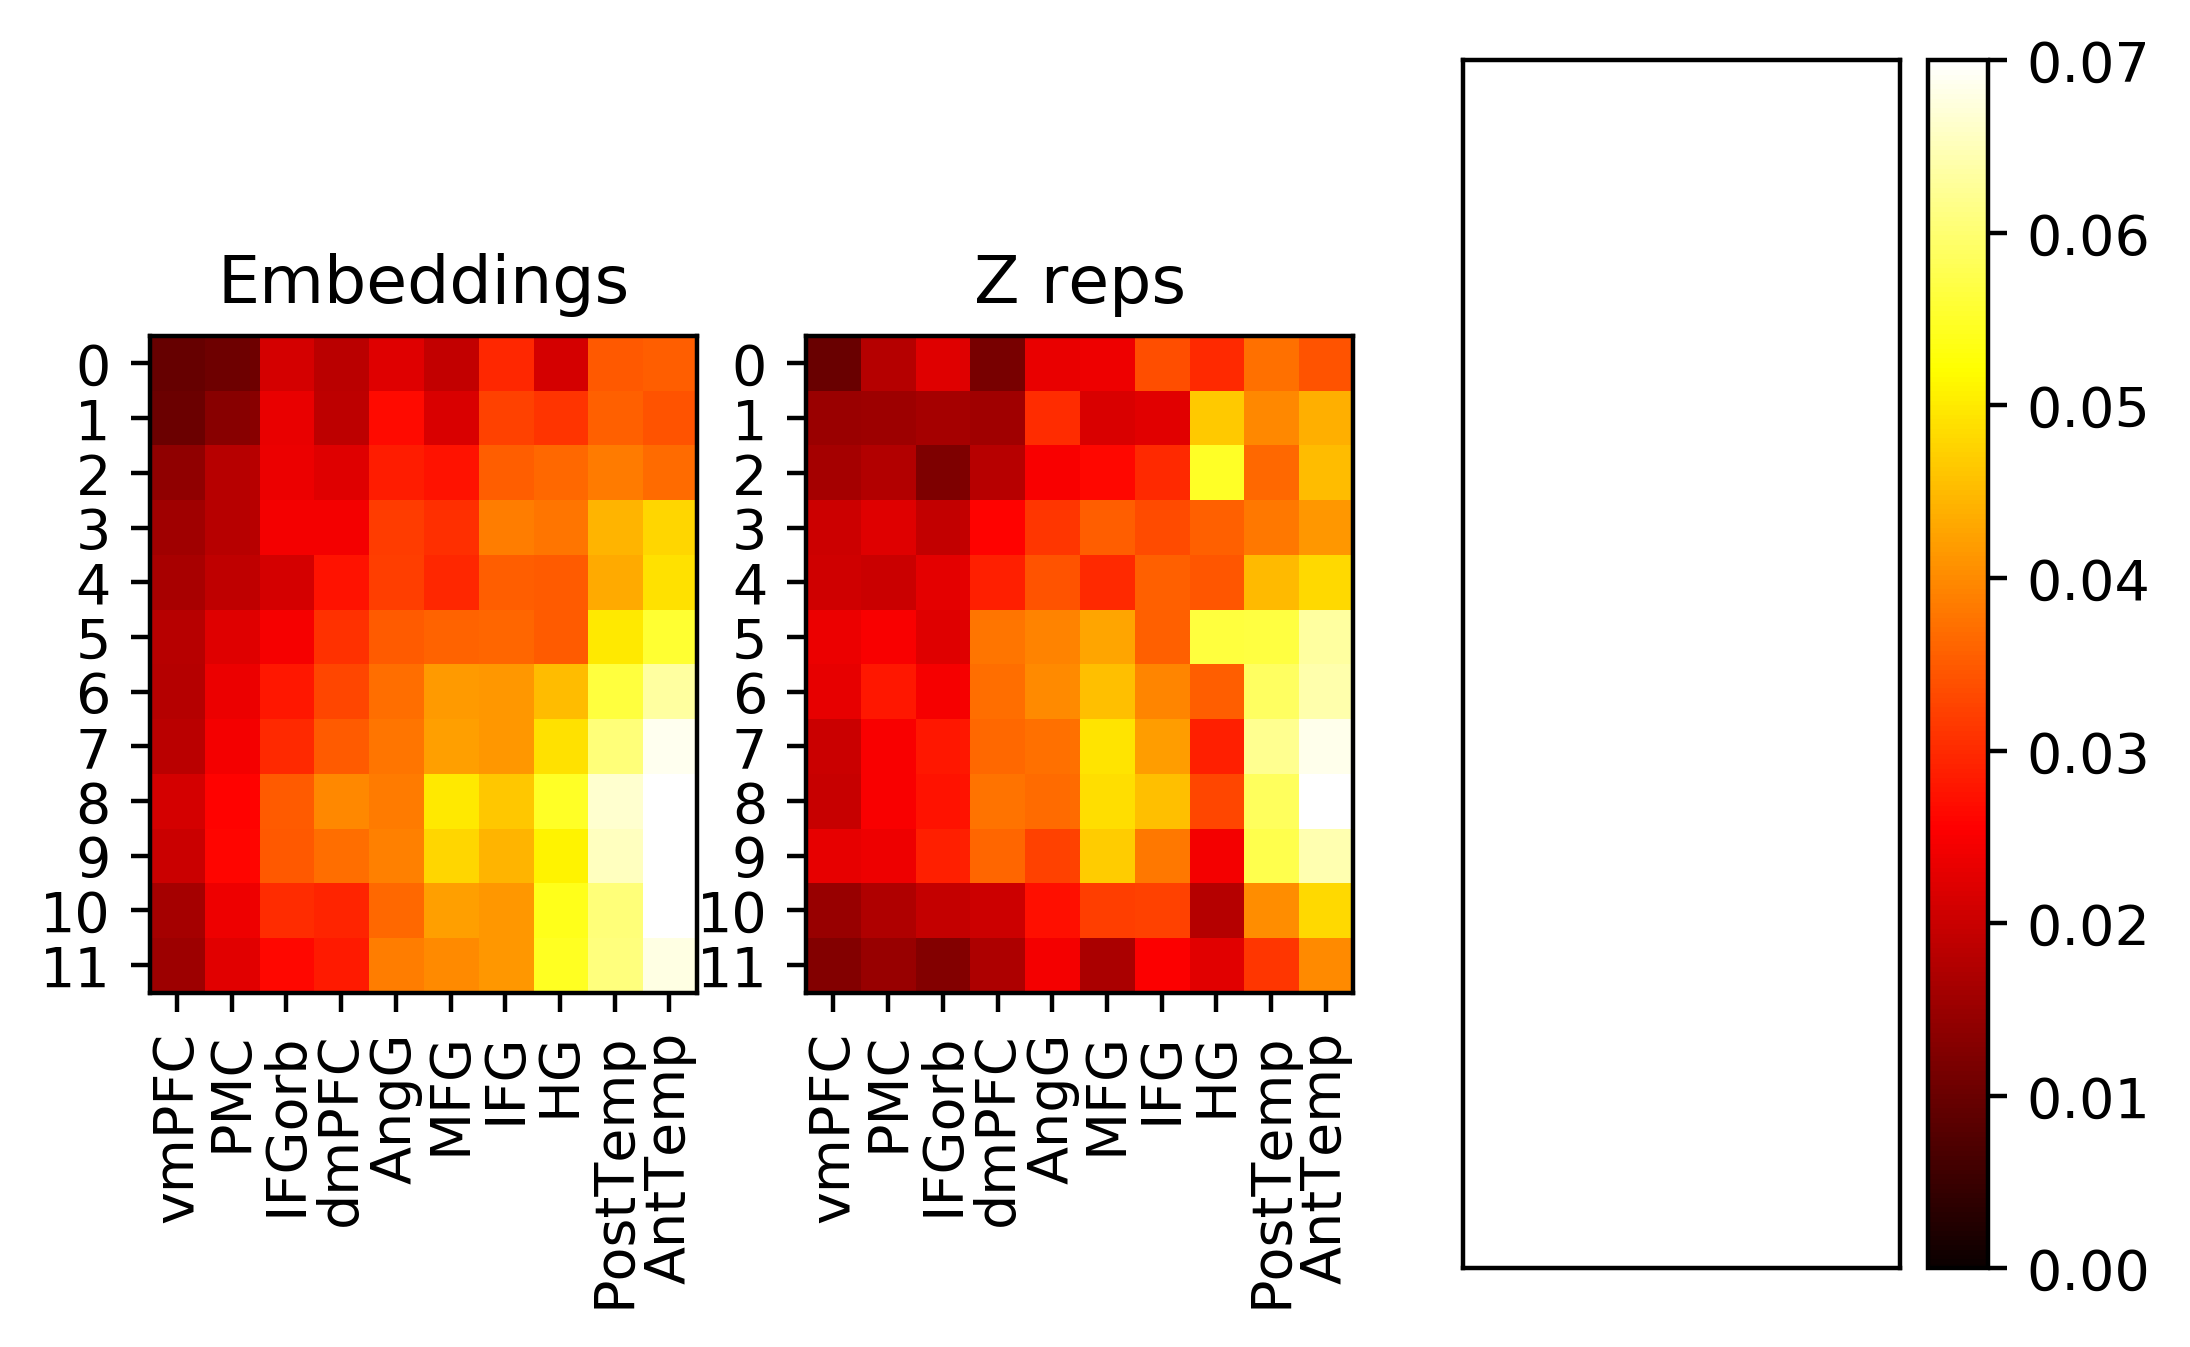

In [13]:
#Sort by last embedding layer 
fig,axarr=plt.subplots(ncols=3,nrows=1,dpi=400)
order=np.argsort(layer_reps_mat[-1,:])
rois=np.asarray(rois)
a=axarr[0].imshow(layer_reps_mat[:,order],vmin=0,vmax=0.07,cmap='hot')
b=axarr[1].imshow(z_reps_mat[:,order],vmin=0,vmax=0.07,cmap='hot')
axarr[0].set_xticks(list(range(10)))
axarr[0].set_xticklabels(rois[order],rotation=90)
axarr[1].set_xticks(list(range(10)))
axarr[1].set_xticklabels(rois[order],rotation=90)
axarr[0].set_yticks(list(range(12)))
axarr[1].set_yticks(list(range(12)))
axarr[0].set_title("Embeddings")
axarr[1].set_title("Z reps")
#plt.colorbar(a,ax=axarr[0])
#fig.colorbar(b,orientation='horizontal',pad=0.8)
fig.colorbar(b,ax=axarr[2])
#axarr[2].spines('right').set_visible(False)
axarr[2].set_xticks([])
axarr[2].set_yticks([])

[]

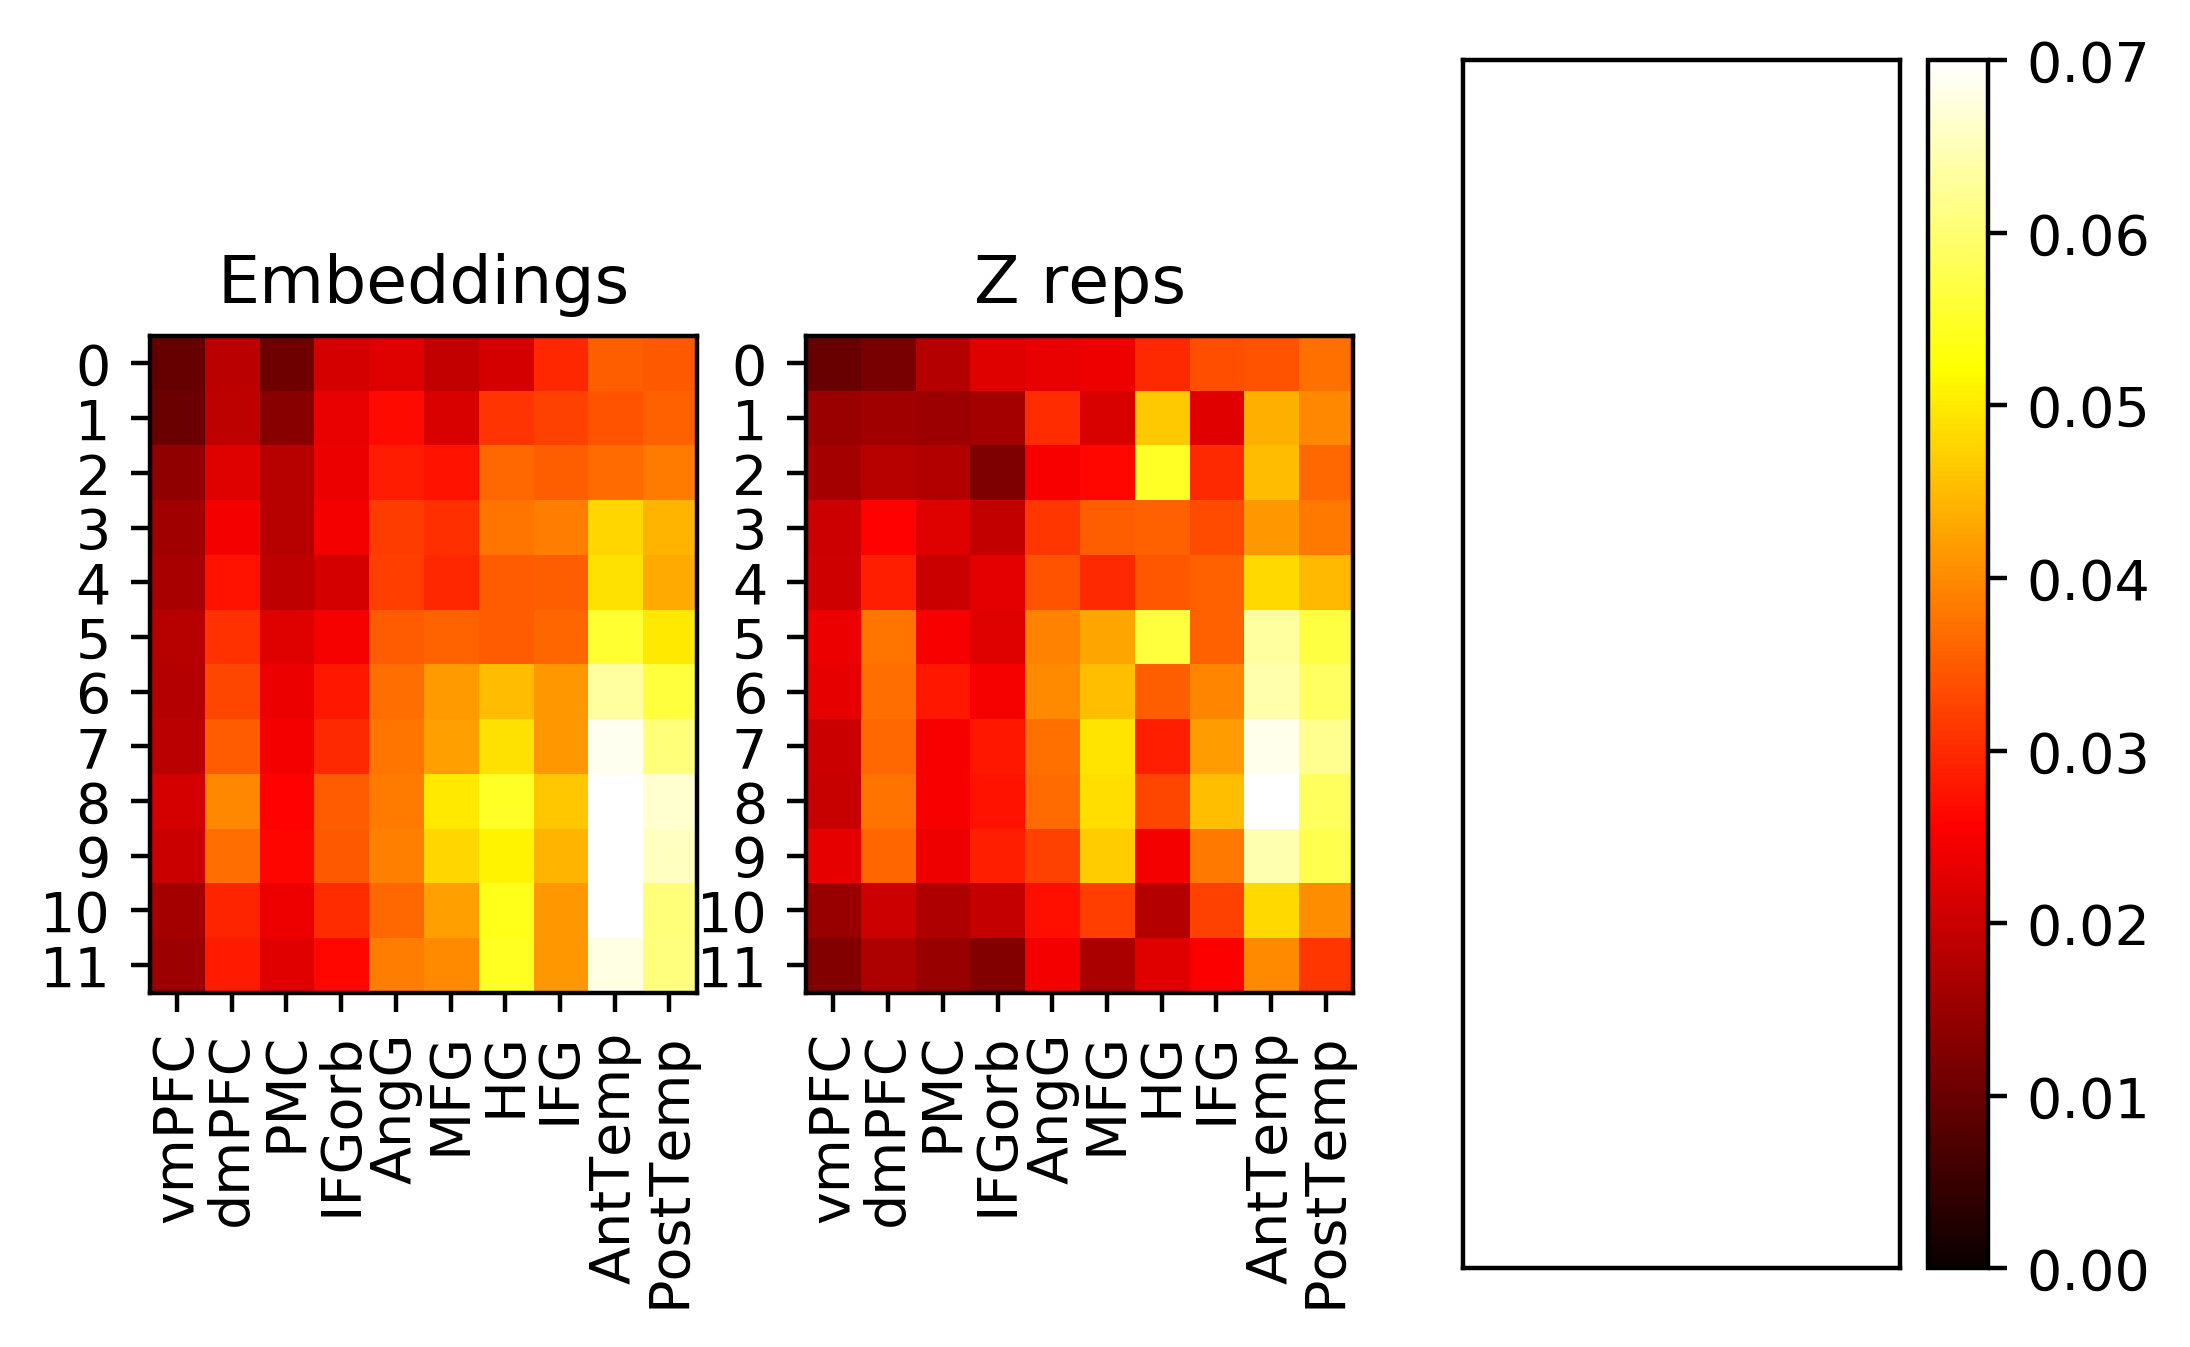

In [14]:
#Sort by first z rep
fig,axarr=plt.subplots(ncols=3,nrows=1,dpi=400)
order=np.argsort(z_reps_mat[0,:])
rois=np.asarray(rois)
a=axarr[0].imshow(layer_reps_mat[:,order],vmin=0,vmax=0.07,cmap='hot')
b=axarr[1].imshow(z_reps_mat[:,order],vmin=0,vmax=0.07,cmap='hot')
axarr[0].set_xticks(list(range(10)))
axarr[0].set_xticklabels(rois[order],rotation=90)
axarr[1].set_xticks(list(range(10)))
axarr[1].set_xticklabels(rois[order],rotation=90)
axarr[0].set_yticks(list(range(12)))
axarr[1].set_yticks(list(range(12)))
axarr[0].set_title("Embeddings")
axarr[1].set_title("Z reps")
#plt.colorbar(a,ax=axarr[0])
#fig.colorbar(b,orientation='horizontal',pad=0.8)
fig.colorbar(b,ax=axarr[2])
#axarr[2].spines('right').set_visible(False)
axarr[2].set_xticks([])
axarr[2].set_yticks([])

[]

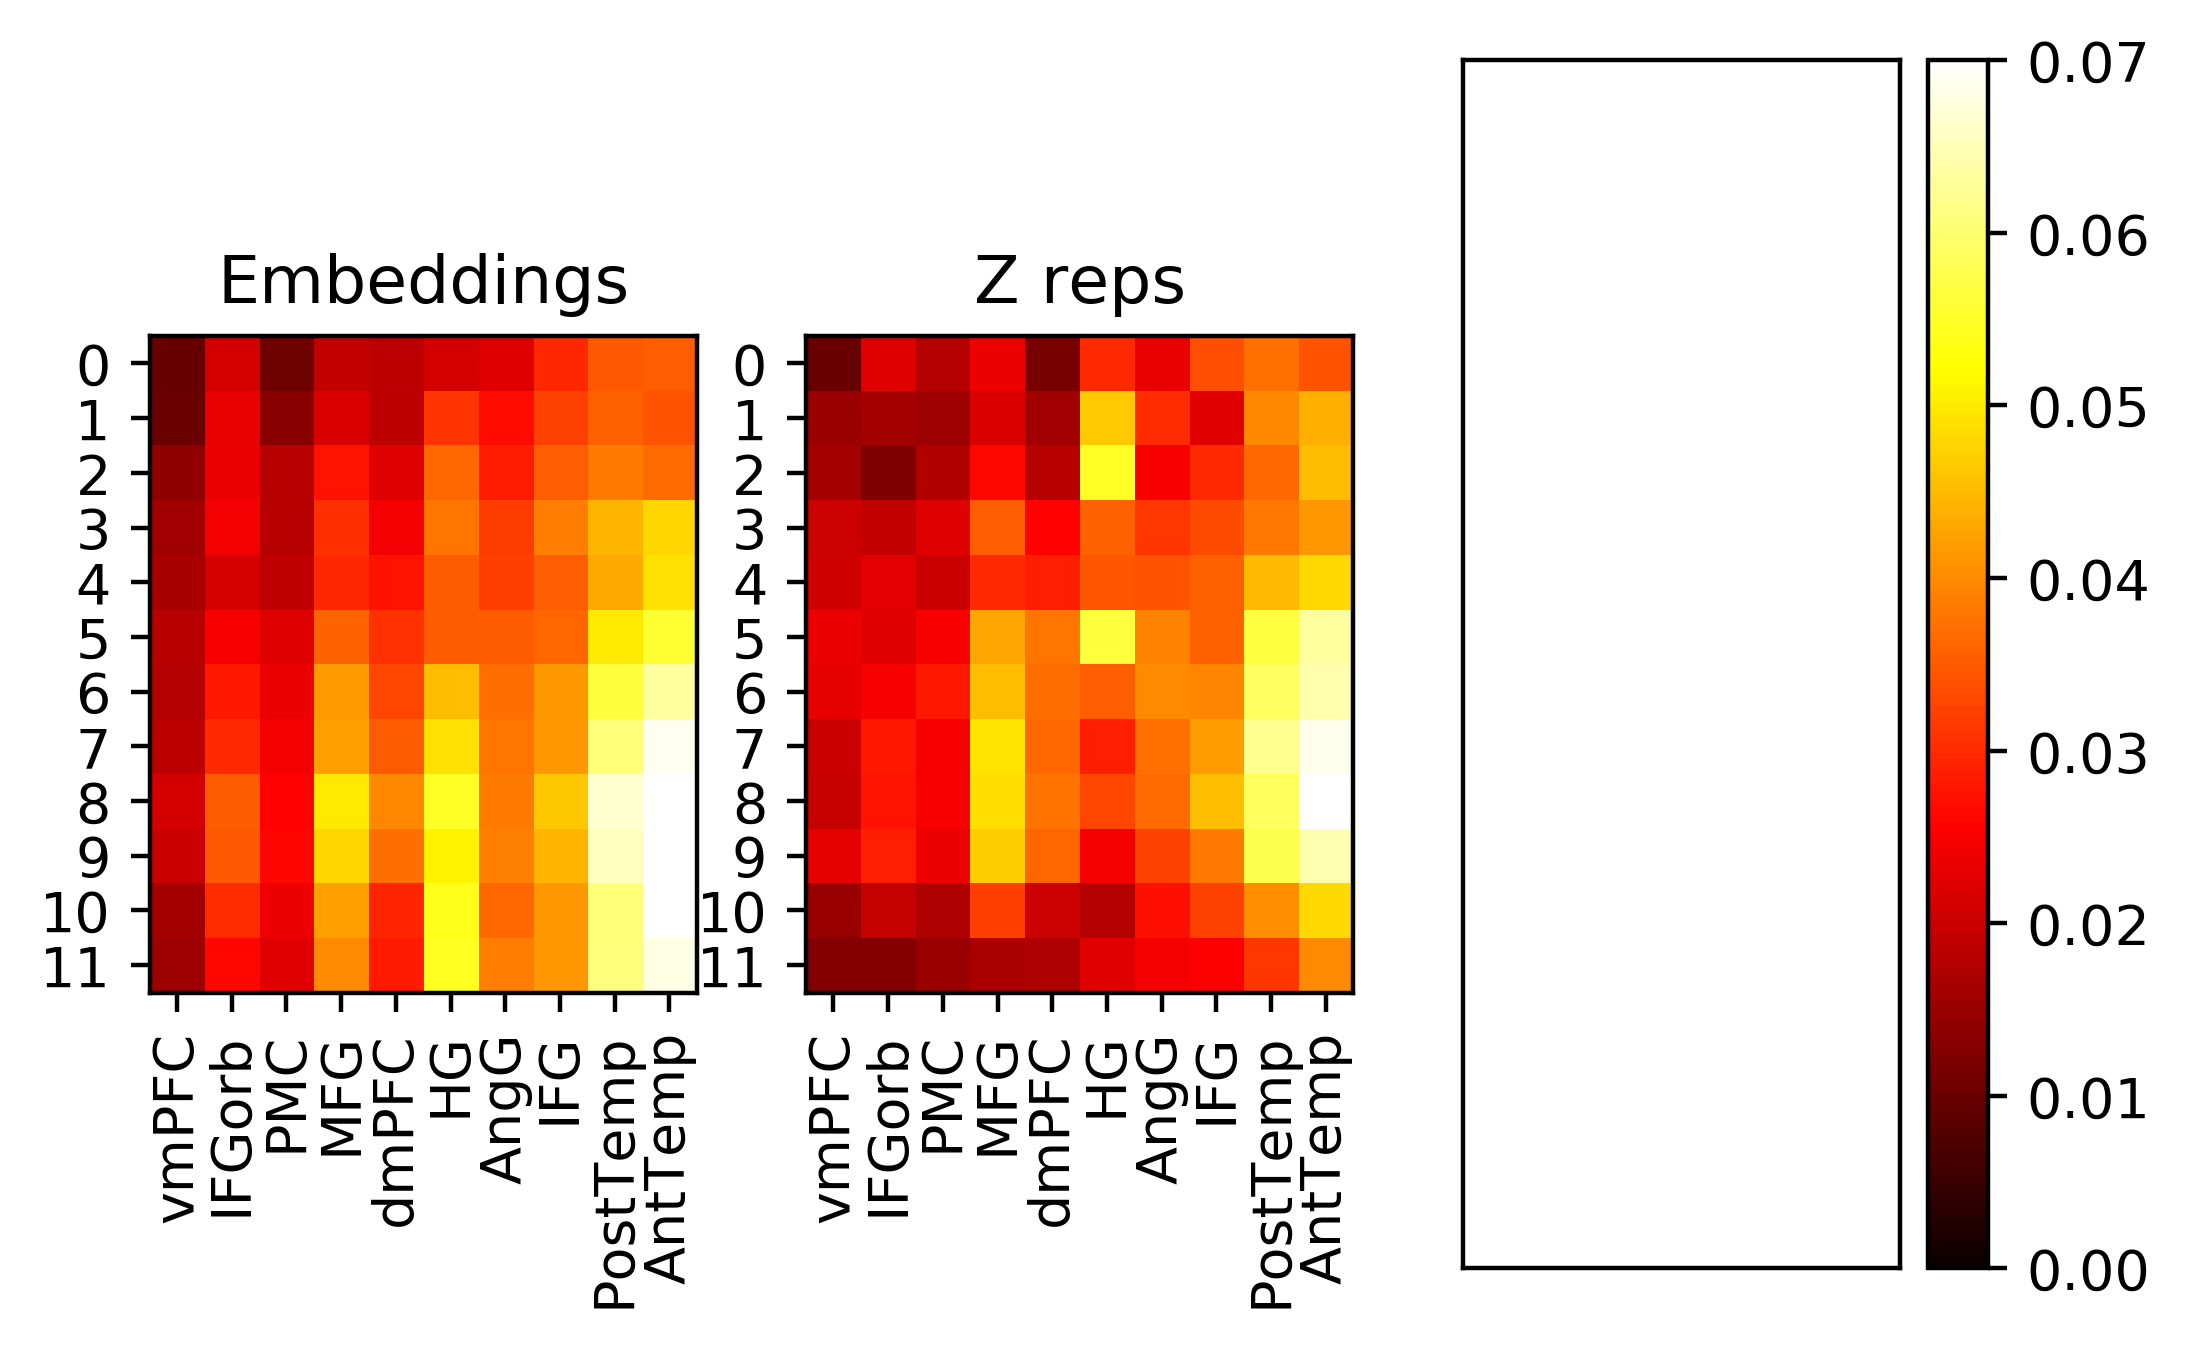

In [15]:
#Sort by last z rep
fig,axarr=plt.subplots(ncols=3,nrows=1,dpi=400)
order=np.argsort(z_reps_mat[-1,:])
rois=np.asarray(rois)
a=axarr[0].imshow(layer_reps_mat[:,order],vmin=0,vmax=0.07,cmap='hot')
b=axarr[1].imshow(z_reps_mat[:,order],vmin=0,vmax=0.07,cmap='hot')
axarr[0].set_xticks(list(range(10)))
axarr[0].set_xticklabels(rois[order],rotation=90)
axarr[1].set_xticks(list(range(10)))
axarr[1].set_xticklabels(rois[order],rotation=90)
axarr[0].set_yticks(list(range(12)))
axarr[1].set_yticks(list(range(12)))
axarr[0].set_title("Embeddings")
axarr[1].set_title("Z reps")
#plt.colorbar(a,ax=axarr[0])
#fig.colorbar(b,orientation='horizontal',pad=0.8)
fig.colorbar(b,ax=axarr[2])
#axarr[2].spines('right').set_visible(False)
axarr[2].set_xticks([])
axarr[2].set_yticks([])